#Getting more listings from SF

In [55]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import pandas as pd
import seaborn as sns
sns.set_context('talk')
sns.set_style('darkgrid') 
import sklearn as skl
import sklearn.metrics
import numpy as np

import sys
sys.path = sys.path + ['..']
import get_airbnb_data
import db
from learning import *

In [14]:
SF_lat = (37.804055-.02, 37.804055+.02)
SF_lon = ( -122.408990 - .01, -122.408990 + .01)
get_airbnb_data.populate_db_raster(SF_lat, SF_lon, step_km=1)

50 listings at 37.784054999999995, -122.41899000000001 page 1
50 listings at 37.784054999999995, -122.41899000000001 page 2
50 listings at 37.784054999999995, -122.41899000000001 page 3
50 listings at 37.784054999999995, -122.41899000000001 page 4
50 listings at 37.784054999999995, -122.41899000000001 page 5
50 listings at 37.784054999999995, -122.41899000000001 page 6
20 listings at 37.784054999999995, -122.41899000000001 page 7
No more at 37.784054999999995, -122.41899000000001 page 8
50 listings at 37.79303820495336, -122.41899000000001 page 1
50 listings at 37.79303820495336, -122.41899000000001 page 2
50 listings at 37.79303820495336, -122.41899000000001 page 3
50 listings at 37.79303820495336, -122.41899000000001 page 4
50 listings at 37.79303820495336, -122.41899000000001 page 5
50 listings at 37.79303820495336, -122.41899000000001 page 6
50 listings at 37.79303820495336, -122.41899000000001 page 7
50 listings at 37.79303820495336, -122.41899000000001 page 8
35 listings at 37.79

In [15]:
SF_lat = (37.703554, 37.811042)
SF_lon = (-122.526268, -122.351688)
get_airbnb_data.populate_db_raster(SF_lat, SF_lon, step_km=1)

No more at 37.703554, -122.526268 page 1
No more at 37.712537204953364, -122.526268 page 1
No more at 37.72152040990673, -122.526268 page 1
No more at 37.7305036148601, -122.526268 page 1
No more at 37.739486819813465, -122.526268 page 1
No more at 37.74847002476683, -122.526268 page 1
No more at 37.7574532297202, -122.526268 page 1
No more at 37.766436434673565, -122.526268 page 1
No more at 37.77541963962693, -122.526268 page 1
No more at 37.7844028445803, -122.526268 page 1
No more at 37.793386049533666, -122.526268 page 1
No more at 37.80236925448703, -122.526268 page 1
No more at 37.703554, -122.51490565076982 page 1
No more at 37.712537204953364, -122.51490565076982 page 1
No more at 37.72152040990673, -122.51490565076982 page 1
No more at 37.7305036148601, -122.51490565076982 page 1
7 listings at 37.739486819813465, -122.51490565076982 page 1
No more at 37.739486819813465, -122.51490565076982 page 2
15 listings at 37.74847002476683, -122.51490565076982 page 1
No more at 37.74847

In [49]:
import imp
import learning
imp.reload(learning)
from learning import *

engine = db.create_root_engine()
rawtable = pd.io.sql.read_sql_table('listings', engine, index_col='id')
Xtr, Xte, ytr, yte = get_training_test_set(rawtable, make_features=make_features2)

In [50]:
Xtr.head()

,amenity0,amenity1,amenity2,amenity3,amenity4,amenity5,amenity6,amenity7,amenity8,amenity9,...,features2_categorical7,features2_categorical8,features2_categorical9,features2_categorical10,features2_categorical11,features2_categorical12,features2_categorical13,features2_categorical14,features2_categorical15,features2_categorical16
id,,,,,,,,,,,,,,,,,,,,,
air936209,1,0,0,0,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
air4122750,1,0,1,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
air277289,1,0,1,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
air3876352,1,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
air2455313,1,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0


In [51]:
import imp
import learning
imp.reload(learning)
clf1 = get_logistic_regression_clf1()
clf1.fit(Xtr, ytr)
skl.metrics.f1_score(yte, clf1.predict(Xte), average=None)

array([ 0.        ,  0.26395939,  0.76706545])

In [52]:
clf1.score(Xte, yte)

0.63646055437100213

In [53]:
skl.metrics.log_loss(yte, clf1.predict_proba(Xte))

0.86248695889489602

#Experimenting with which logistic regression is the best.
TODO: try L1 vs L2

In [57]:
np.logspace(-2, 2, num=10)

array([  1.00000000e-02,   2.78255940e-02,   7.74263683e-02,
         2.15443469e-01,   5.99484250e-01,   1.66810054e+00,
         4.64158883e+00,   1.29154967e+01,   3.59381366e+01,
         1.00000000e+02])

In [58]:
scaler = skl.preprocessing.StandardScaler()
clf = skl.linear_model.LogisticRegression(multi_class='ovr', C=0.010, penalty='l2', class_weight='auto')
clf2 = skl.pipeline.Pipeline([
        ('scaler', scaler), ('clf', clf)])
param_grid={'clf_C': np.logspace(-2, 2, num=10), 'clf_penalty': ('l1', 'l2',)}
gridclf2 = sklearn.grid_search.GridSearchCV(clf2, param_grid=param_grid, scoring='log_loss', n_jobs=4, cv=3)

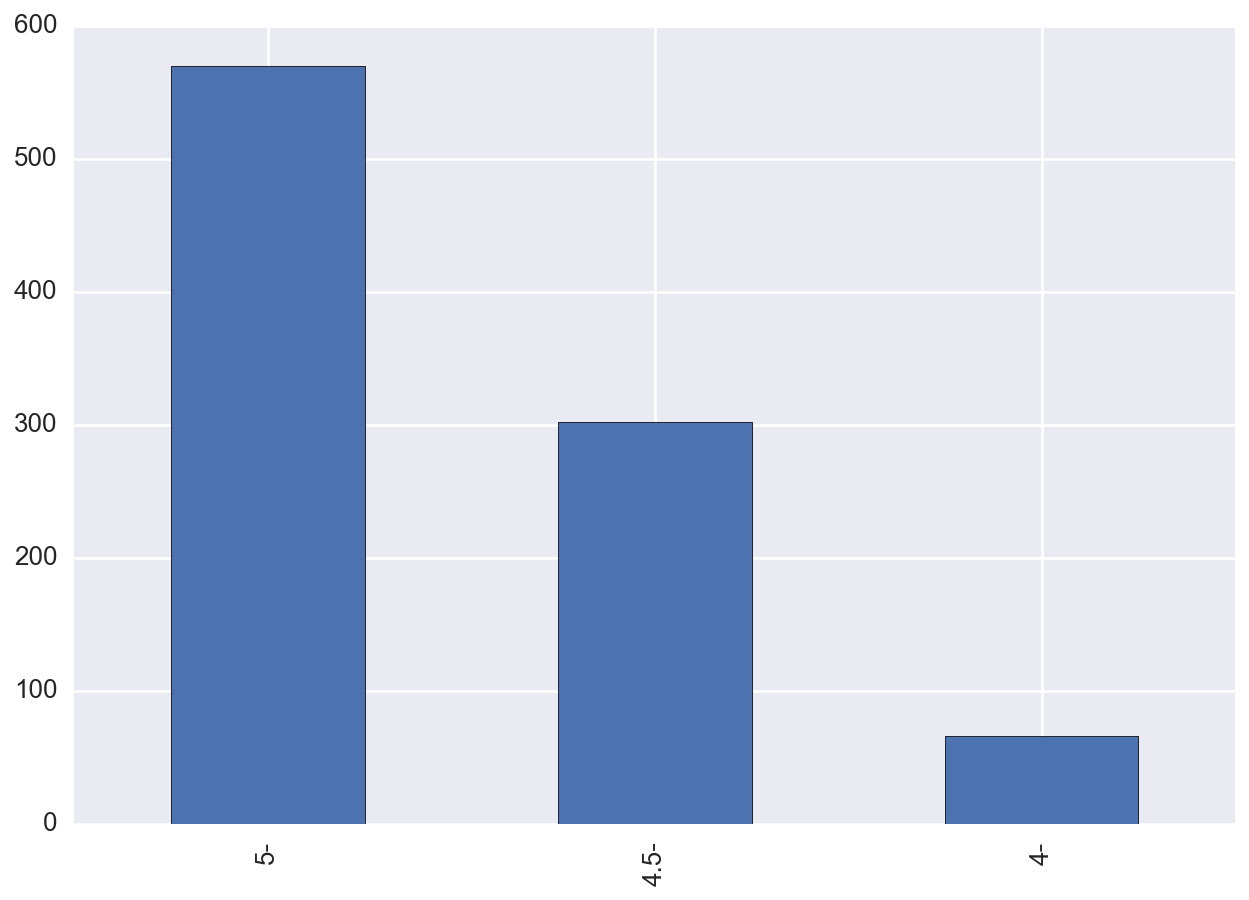

In [40]:
yte.value_counts().plot(kind='bar')